# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from numpy.random import seed
medical = pd.read_csv('insurance2.csv')

In [7]:
medical.shape

(1338, 8)

In [8]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__

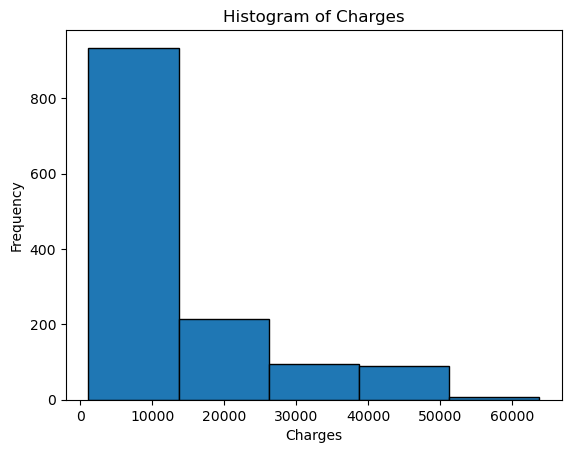

Mean Charges: 13270.42
Standard Deviation of Charges: 12110.01


In [9]:
# Plot histogram of charges
plt.hist(medical['charges'], bins=5, edgecolor='black')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.title('Histogram of Charges')
plt.show()

# Calculate mean and standard deviation of charges
mean_charges = np.mean(medical['charges'])
std_charges = np.std(medical['charges'], ddof=1)  # Bessel's correction

print(f"Mean Charges: {mean_charges:.2f}")
print(f"Standard Deviation of Charges: {std_charges:.2f}")

__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__

In [12]:
from scipy import stats


population_mean = 12000

# Perform one-sample t-test
t_statistic, p_value = stats.ttest_1samp(medical['charges'], population_mean)

# Print results
print(f"T-statistic: {t_statistic:.2f}")
print(f"P-value: {p_value:.4f}")

# Determine significance
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: The average charge is significantly less than 12,000.")
else:
    print("Fail to reject the null hypothesis: There is not enough evidence to say the average charge is less than 12,000.")

T-statistic: 3.84
P-value: 0.0001
Reject the null hypothesis: The average charge is significantly less than 12,000.


__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

__A:__

In [16]:
from scipy.stats import t

# Sample data
sample_size = len(medical['charges'])
sample_mean = np.mean(medical['charges'])
sample_std = np.std(medical['charges'], ddof=1)  # Using Bessel's correction

# Population mean to test against
population_mean = 12000

# Calculate the critical t-value for a one-sided test at 95% confidence level
alpha = 0.05
t_critical = t.ppf(1 - alpha, df=sample_size - 1)  # One-tailed test

# Calculate the margin of error for the one-sided test
margin_of_error_one_sided = t_critical * (sample_std / np.sqrt(sample_size))

# Calculate the lower bound of the one-sided confidence interval
lower_bound_one_sided = sample_mean - margin_of_error_one_sided

# Print results
print(f"Sample Mean: {sample_mean:.2f}")
print(f"Margin of Error for One-Sided Interval: {margin_of_error_one_sided:.2f}")
print(f"95% One-Sided Confidence Interval Lower Bound: {lower_bound_one_sided:.2f}")

# Check if the interval includes the threshold of 12,000
if lower_bound_one_sided < population_mean:
    print("The one-sided confidence interval suggests that the average charge is likely less than 12,000.")
else:
    print("The one-sided confidence interval does not suggest that the average charge is less than 12,000.")

Sample Mean: 13270.42
Margin of Error for One-Sided Interval: 544.94
95% One-Sided Confidence Interval Lower Bound: 12725.49
The one-sided confidence interval does not suggest that the average charge is less than 12,000.


The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

__A:__ The key assumption made here is that the variances of the two groups are equal. This is known as the assumption of homogeneity of variances or homoscedasticity. When this assumption holds, using the pooled standard deviation is appropriate. If the variances are not equal, a different test, such as Welch's t-test, should be used, which does not assume equal variances and adjusts the degrees of freedom accordingly.


__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ 

df=63

t=3.82

In [17]:
from scipy.stats import t

# Calculate p-value for two-tailed test
p_value = 2 * (1 - t.cdf(3.82, df=63))
print(f"P-value: {p_value:.4f}")

P-value: 0.0003


In [18]:
from scipy import stats

# Sample data
group1 = np.random.normal(loc=50, scale=5, size=30)
group2 = np.random.normal(loc=45, scale=5.5, size=35)

# Perform independent two-sample t-test
t_statistic, p_value = stats.ttest_ind(group1, group2, equal_var=True)

print(f"t-statistic from scipy: {t_statistic:.2f}")
print(f"p-value from scipy: {p_value:.4f}")

t-statistic from scipy: 2.82
p-value from scipy: 0.0064


Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__ As of the current documentation, scipy.stats does not have a direct function named ztest for performing a z-test from a sample. Instead, you have to manually compute the z-test or use other approaches. Here's how you can manually perform a z-test using scipy.stats: Then, use scipy.stats.norm to compute the p-value

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test